# Initialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy_sz import Class
import classy_sz
classy_sz.__file__

Metal device set to: Apple M1 Pro


2023-03-28 12:09:14.854215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 12:09:14.854363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [2]:
#plotting settings
plot_params= {
    'figure.figsize': (8,6),
    'axes.labelsize': 15,
    'axes.grid': True,
    'grid.alpha': 0.2,
    'grid.linestyle':'--',
    'axes.grid.which': 'both',
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 13,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.major.size': 7,
    'xtick.minor.size': 3,
    'ytick.major.size': 7,
    'ytick.minor.size': 3,
    'axes.titlesize': 20,
    'xtick.major.size':5,
    'ytick.major.size':5,
    'xtick.major.pad':10,
    'ytick.major.pad':5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    
}
plt.rcParams.update(plot_params)

In [3]:
# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06}

In [4]:
zmin=0.005 
zmax=3.
y_dict={'output':'dydz,tSZ_1h',

        # mass function/pressure profile/concentration prescriptions 
        'mass function' : 'T10',
        'hm_consistency': 0,             
        'pressure profile': 'B12',
        'P0_B12': 11,
        'concentration parameter': 'B13',

        #P(k) settings for mass function
        'k_per_decade_class_sz':80.,
        'k_min_for_pk_class_sz':1e-4,
        'k_max_for_pk_class_sz':7.,

        #integration precision settings
        'redshift_epsrel': 1e-4,
        'redshift_epsabs': 1e-100,
        'mass_epsrel':1e-4,
        'mass_epsabs':1e-100,

        #redshift and mass bounds
        'z_min' : zmin,
        'z_max' : zmax,
        'M_min' : 1e11,
        'M_max' : 1e16,

        "ell_min" : 2,
        "ell_max" : 11000,
        'dell': 0,
        'dlogell': 0.2,
        # pressure profile params:

        'delta for electron pressure':'200c',
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        # 'n_k_pressure_profile' : 80,
        'use_fft_for_profiles_transform': 1,
        'x_min_gas_pressure_fftw' : 1e-4,
        'x_max_gas_pressure_fftw' : 1e2,
        'N_samp_fftw' : 1024,

        'x_outSZ': 4.,
        'truncate_wrt_rvir': 0,
        # 'pressure_profile_epsrel':1e-4,
        # 'pressure_profile_epsabs':1e-100
       }

In [5]:
%%time
M = Class()
M.set(cosmo_params)
M.set(y_dict)
M.compute_class_szfast()

dydz=np.vectorize(M.get_dydz_at_z)
dydzdlnm = np.vectorize(M.get_dydzdlnm_at_z_and_m)

CPU times: user 4.75 s, sys: 237 ms, total: 4.99 s
Wall time: 919 ms


In [6]:
z_s_y = np.linspace(0.005,3.,1000)
# dydz = dy_dz_at_zs(z_s_y)
norm_y = np.trapz(dydz(z_s_y),z_s_y)
print(f"mean y: {norm_y}")


mean y: 8.774660997296731e-07


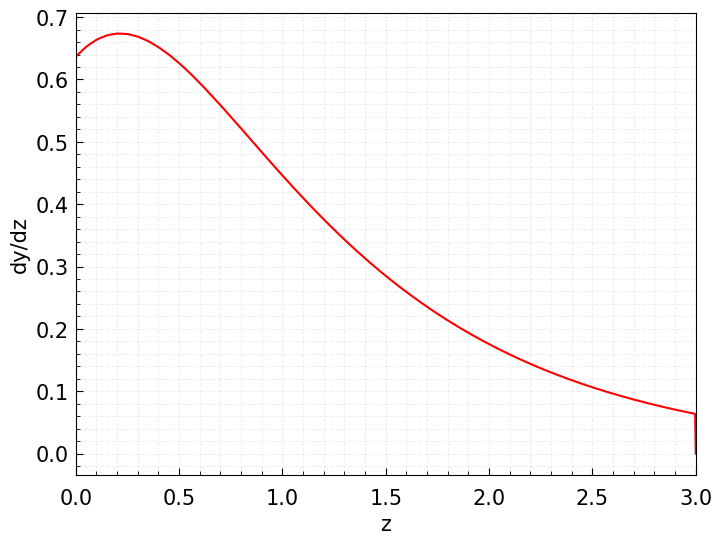

In [7]:
plt.plot(z_s_y, dydz(z_s_y)/norm_y, color='red', label=r'dy/dz')
plt.xlabel('z')
plt.ylabel('dy/dz')
plt.xlim([0,3])
plt.savefig("figures/dydz.pdf")

In [8]:
l = np.asarray(M.cl_sz()['ell'])
cl_yy_1h = np.asarray(M.cl_sz()['1h'])
# cl_yy_2h = np.asarray(M.cl_sz()['2h'])

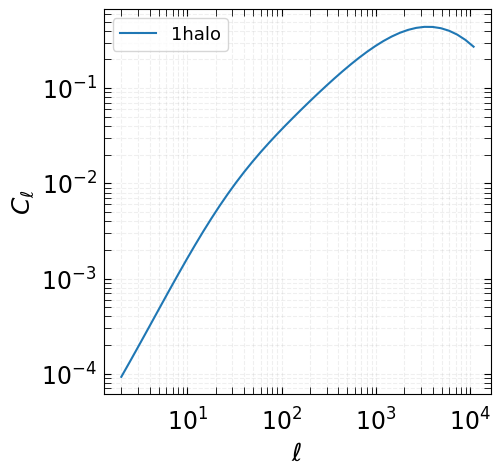

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
ax.plot(l,cl_yy_1h,label='1halo')
# ax.plot(l,cl_yy_2h,label='2halo')
# ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()

# mean y differential

In [19]:
%%time
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e16),500)
dydzdm_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10m_array:
        dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm)
        ilq+=1
    izp+=1

/Users/boris/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: divide by zero encountered in get_dydzdlnm_at_z_and_m (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 2.27 s, sys: 8.71 ms, total: 2.28 s
Wall time: 2.28 s


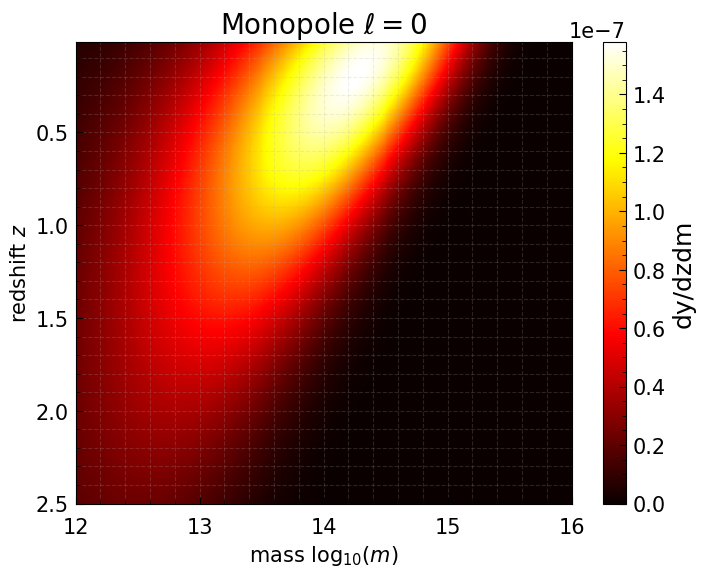

In [20]:
im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                # norm=colors.LogNorm(vmin=kappa_2d.min(), vmax=kappa_2d.max()),
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right
cbar.set_label('dy/dzdm',size=18)
plt.xlabel('mass $\mathrm{log}_{10}(m)$')
plt.ylabel('redshift $z$')
# plt.show()
plt.title('Monopole $\ell = 0$')
plt.savefig('figures/dydzdlnm_heatmap.pdf')

# l=500 differential

In [28]:
%%time
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e16),500)
dydzdm_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10m_array:
        dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm,l=500)
        ilq+=1
    izp+=1

CPU times: user 2.81 s, sys: 6.57 ms, total: 2.82 s
Wall time: 2.81 s


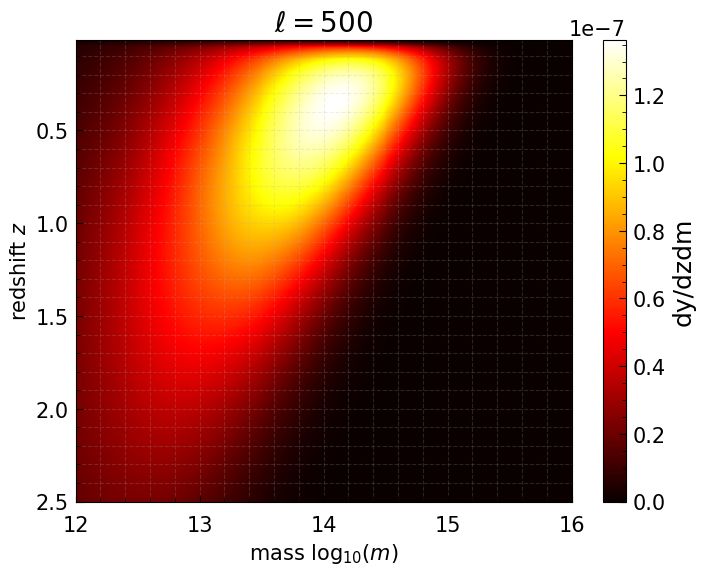

In [29]:
im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right
cbar.set_label('dy/dzdm',size=18)
plt.xlabel('mass $\mathrm{log}_{10}(m)$')
plt.ylabel('redshift $z$')
# plt.show()
plt.title('$\ell = 500$')
plt.savefig('figures/dy500dzdlnm_heatmap.pdf')

# l=10000 differential

In [24]:
%%time
z_array_2d = np.linspace(0.01,2.5,500)
log10m_array = np.linspace(np.log10(1e12),np.log10(1e16),500)
dydzdm_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10m_array:
        dydzdm_2d[izp][ilq] = dydzdlnm(zp,10**lm,l=10000)
        ilq+=1
    izp+=1

CPU times: user 2.87 s, sys: 4.38 ms, total: 2.88 s
Wall time: 2.88 s


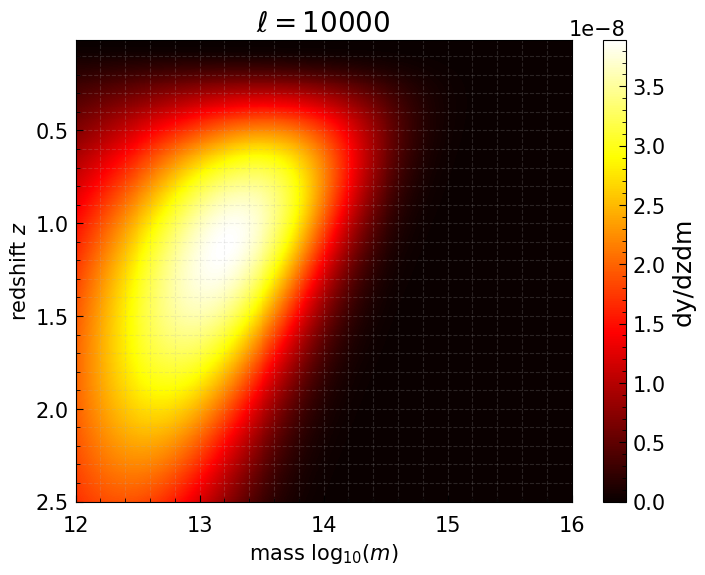

In [25]:
im = plt.imshow(dydzdm_2d, cmap='hot', interpolation='nearest',
                extent = [12,16,z_array_2d[-1],z_array_2d[0]],
                aspect='auto')
cbar = plt.colorbar(im) # adding the colobar on the right
cbar.set_label('dy/dzdm',size=18)
plt.xlabel('mass $\mathrm{log}_{10}(m)$')
plt.ylabel('redshift $z$')
# plt.show()
plt.title('$\ell = 10000$')
plt.savefig('figures/dy10000dzdlnm_heatmap.pdf')

# Old part of the notebook keeping for reference

# Useful functions

In [44]:
def dy_dz_at_zs(z_arr, zmin=0.005, zmax=7.):
    
    """function to easily compute dy/dz for an array of z's.
    
    Input:
    z_arr: array of redshifts for which to compute dydz
    zmin: minimum redshift 
    zmax: maximum redshift 
    
    Output:
    
    dydzs: array of dy/dz 
    """
    
    
    # the parameters needed for cosmology:
    # use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
    # TT,TE,EE+lowE+lensing+BAO
    cosmo_params = {
    'omega_b': 0.02242,
    'omega_cdm':  0.11933,
    'H0': 67.66, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.047,
    'n_s': 0.9665,
    
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06}

    
    y_dict={'output':'dydz',
        
        # mass function/pressure profile/concentration prescriptions 
        'mass function' : 'T10',
        'hm_consistency': 0,             
        'pressure profile': 'B12',
        'P0_B12': 11,
        'concentration parameter': 'B13',
    
        #P(k) settings for mass function
        'k_per_decade_class_sz':80.,
        'k_min_for_pk_class_sz':1e-4,
        'k_max_for_pk_class_sz':7.,
        
        #integration precision settings
        'redshift_epsrel': 1e-4,
        'redshift_epsabs': 1e-100,
        'mass_epsrel':1e-4,
        'mass_epsabs':1e-100,
        
        #redshift and mass bounds
        'z_min' : zmin,
        'z_max' : zmax,
        'M_min' : 1e11*cosmo_params['H0']/100.,
        'M_max' : 10**14.5*cosmo_params['H0']/100.,
        
        # pressure profile params:
        
        'delta for electron pressure':'200c',
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        'n_ell_pressure_profile' : 80,
        
        'x_outSZ': 4.,
        'truncate_wrt_rvir': 0,
        'pressure_profile_epsrel':1e-4,
        'pressure_profile_epsabs':1e-100}
    
    M = Class()
    M.set(cosmo_params)
    M.set(y_dict)
    M.compute()
    dydz=M.get_dydz_at_z
    
    dydzs=np.zeros((len(z_arr)))

    for i in range(len(z_arr)):
        dydzs[i]=dydz(z_arr[i])

    return dydzs

    


In [4]:
def y_at_M_and_z():
    
    """function to using class_sz output vectorized function y(M,z)
    
    Input:
    None
    
    Output:
    y_at_M_z: function that takes M and z as arguments and outputs Compton-y
    """
    
    
    # the parameters needed for cosmology:
    # use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
    # TT,TE,EE+lowE+lensing+BAO
    cosmo_params = {
    'omega_b': 0.02242,
    'omega_cdm':  0.11933,
    'H0': 67.66, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.047,
    'n_s': 0.9665,
    
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06}

    
    y_dict={'output':'mean_y',
        
        # mass function/pressure profile/concentration prescriptions 
        'mass function' : 'T10',
        'hm_consistency': 0,             
        'pressure profile': 'B12',
        'P0_B12': 11,
        'concentration parameter': 'B13',
    
        #P(k) settings for mass function
        'k_per_decade_class_sz':80.,
        'k_min_for_pk_class_sz':1e-4,
        'k_max_for_pk_class_sz':7.,
        
        #integration precision settings
        'redshift_epsrel': 1e-4,
        'redshift_epsabs': 1e-100,
        'mass_epsrel':1e-4,
        'mass_epsabs':1e-100,
        
        #redshift and mass bounds
        'z_min' : 0.005,
        'z_max' : 6.,
        'M_min' : 1e10*cosmo_params['H0']/100.,
        'M_max' : 1e16*cosmo_params['H0']/100.,
        
        # pressure profile params:
        
        'delta for electron pressure':'200c',
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        'n_ell_pressure_profile' : 80,
        
        'x_outSZ': 4.,
        'truncate_wrt_rvir': 0,
        'pressure_profile_epsrel':1e-4,
        'pressure_profile_epsabs':1e-100}
    
    M = Class()
    M.set(cosmo_params)
    M.set(y_dict)
    M.compute()
    y_at_M_z=M.get_y_at_m_and_z
    
    return np.vectorize(y_at_M_z)

In [5]:
def mean_y(zmin=0.005, Mmin=1e11, zmax=6.,Mmax=1e15):
    
    """function to compute the mean y.
    
    Input:
    zmin: minimum redshift 
    Mmin: minimum mass
    zmax: maximum redshift 
    Mmax: maximum mass
    
    Output:
    
    mean_y: integrated mean Compton-y between for specified bounds
    
    """
    
    
    # the parameters needed for cosmology:
    # use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
    # TT,TE,EE+lowE+lensing+BAO
    cosmo_params = {
    'omega_b': 0.02242,
    'omega_cdm':  0.11933,
    'H0': 67.66, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.047,
    'n_s': 0.9665,
    
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06}

    
    y_dict={'output':'mean_y',
        
        # mass function/pressure profile/concentration prescriptions 
        'mass function' : 'T10',
        'hm_consistency': 0,             
        'pressure profile': 'B12',
        'P0_B12': 11,
        'concentration parameter': 'B13',
    
        #P(k) settings for mass function
        'k_per_decade_class_sz':80.,
        'k_min_for_pk_class_sz':1e-4,
        'k_max_for_pk_class_sz':7.,
        
        #integration precision settings
        'redshift_epsrel': 1e-4,
        'redshift_epsabs': 1e-100,
        'mass_epsrel':1e-4,
        'mass_epsabs':1e-100,
        
        #redshift and mass bounds
        'z_min' : zmin,
        'z_max' : zmax,
        'M_min' : Mmin*cosmo_params['H0']/100.,
        'M_max' : Mmax*cosmo_params['H0']/100.,
        
        # pressure profile params:
        
        'delta for electron pressure':'200c',
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        'n_ell_pressure_profile' : 80,
        
        'x_outSZ': 2.,
        'truncate_wrt_rvir': 0,
        'pressure_profile_epsrel':1e-4,
        'pressure_profile_epsabs':1e-100}
    
    M = Class()
    M.set(cosmo_params)
    M.set(y_dict)
    M.compute()
    mean_y=M.get_mean_y()
    
    
    return mean_y

# dy/dz

In [45]:
z_s_y = np.linspace(0.005,3.,1000)
dydz = dy_dz_at_zs(z_s_y)
norm_y = np.trapz(dydz,z_s_y)
print(f"mean y: {norm_y}")


mean y: 7.415773522468085e-07


(0.0, 3.0)

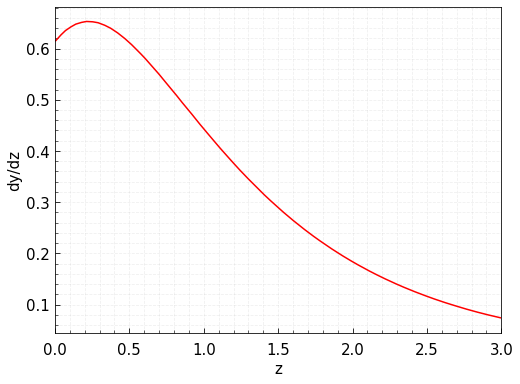

In [23]:
plt.plot(z_s_y[0:], dydz[0:]/norm_y, color='red', label=r'dy/dz')
plt.xlabel('z')
plt.ylabel('dy/dz')
plt.xlim([0,3])
plt.savefig("figures/dydz.pdf")

## Plotting integrated Compton-y (3D)
### y(zmin=0.005, z; M, Mmax=1e15) 

In [13]:
%%time
zs=np.linspace(0.01, 3., 10)
Ms=np.geomspace(1e11, 10**14.95, 10)
ys_zmin_Mmax_fix=np.zeros((len(zs),len(Ms)))

for i in range(len(zs)):
    
    for j in range(len(Ms)):
        
        ys_zmin_Mmax_fix[i,j]=mean_y(zmin=0.005, Mmin=Ms[j], zmax=zs[i], Mmax=1e15)
        

CPU times: user 3h 1min 9s, sys: 1min 18s, total: 3h 2min 28s
Wall time: 26min 15s


In [20]:
%%time
zs=np.linspace(0.01, 2.995, 25)
Ms=np.geomspace(1e11, 10**14.95, 25)
ys_zmax_Mmax_fix=np.zeros((len(zs),len(Ms)))

for i in range(len(zs)):
    
    for j in range(len(Ms)):
        
        ys_zmax_Mmax_fix[i,j]=mean_y(zmin=zs[i], Mmin=Ms[j], zmax=3., Mmax=1e15)

CPU times: user 18h 15min 55s, sys: 8min 33s, total: 18h 24min 28s
Wall time: 2h 38min 6s


/var/folders/ck/fmp07qn96wv4ksq8dy_2xw0w0000gn/T/ipykernel_4129/3191470550.py:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar2 = fig.colorbar(ymap2, ax=ax[:], shrink=0.75)


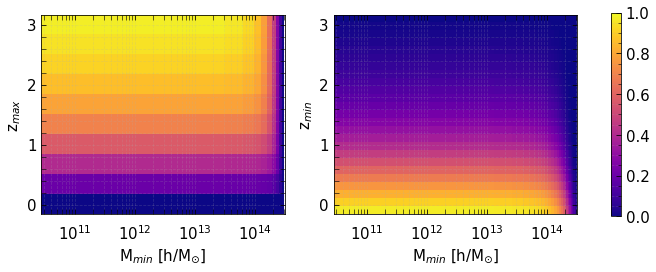

In [84]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
gridspec = {'width_ratios': [1, 1]}
fig, ax = plt.subplots(1,2,figsize=(12,5),gridspec_kw=gridspec)

ax[0].set_xscale('log')
ax[0].tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax[0].tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax[0].xaxis.set_ticks_position('both')
ax[0].yaxis.set_ticks_position('both')
plt.setp(ax[0].get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax[0].get_xticklabels(), fontsize=label_size)
ax[0].grid(visible=True, which="both", alpha=0.2, linestyle='--')
ax[0].set_ylabel(r"z$_{max}$", fontsize=label_size)
ax[0].set_xlabel(r"M$_{min}$ [h/M$_{\odot}$]", fontsize=label_size)
ymap=ax[0].imshow(ys_zmin_Mmax_fix/norm_y, extent=axis_range, origin='lower', cmap='plasma', vmin=0, vmax=1)

ax[1].set_xscale('log')
ax[1].tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax[1].tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax[1].xaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')
plt.setp(ax[1].get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax[1].get_xticklabels(), fontsize=label_size)
ax[1].grid(visible=True, which="both", alpha=0.2, linestyle='--')
ax[1].set_ylabel(r"z$_{min}$", fontsize=label_size)
ax[1].set_xlabel(r"M$_{min}$ [h/M$_{\odot}$]", fontsize=label_size)
ymap2=ax[1].imshow(ys_zmax_Mmax_fix/norm_y, extent=axis_range, origin='lower', cmap='plasma',vmin=0, vmax=1)
cbar2 = fig.colorbar(ymap2, ax=ax[:], shrink=0.75)
plt.savefig("figures/mean_y_3D.pdf")

## Integrated y (2D) 
### y(z, zmax=3; Mmin=1e11, Mmax=1e15) 


In [18]:
%%time 
zs=np.linspace(0.005,2.995,100)
ys_zmin=np.zeros((len(zs)))

for i in range(len(zs)):
    ys_zmin[i]=mean_y(zmin=zs[i], Mmin=1e11, zmax=3., Mmax=1e15)
    print(zs[i])

0.005
0.03520202020202021
0.06540404040404041
0.09560606060606062
0.1258080808080808
0.15601010101010104
0.18621212121212125
0.21641414141414145
0.24661616161616165
0.27681818181818185
0.3070202020202021
0.33722222222222226
0.3674242424242425
0.39762626262626266
0.4278282828282829
0.45803030303030307
0.4882323232323233
0.5184343434343435
0.5486363636363637
0.5788383838383839
0.6090404040404042
0.6392424242424243
0.6694444444444445
0.6996464646464647
0.729848484848485
0.7600505050505052
0.7902525252525253
0.8204545454545455
0.8506565656565658
0.880858585858586
0.9110606060606061
0.9412626262626264
0.9714646464646466
1.0016666666666667
1.0318686868686868
1.0620707070707072
1.0922727272727273
1.1224747474747474
1.1526767676767677
1.1828787878787879
1.2130808080808082
1.2432828282828283
1.2734848484848484
1.3036868686868688
1.333888888888889
1.3640909090909092
1.3942929292929294
1.4244949494949495
1.4546969696969698
1.48489898989899
1.5151010101010103
1.5453030303030304
1.5755050505050505


### y(zmin=0.005, zmax=3; M, Mmax=1e15) 

In [19]:
%%time 
Ms=np.geomspace(1e11, 1e15,100)
ys_Mmin=np.zeros((len(Ms)))

for i in range(len(Ms)):
    ys_Mmin[i]=mean_y(zmin=0.005, Mmin=Ms[i], zmax=3., Mmax=1e15)
    print(Ms[i])

100000000000.0
109749876549.30545
120450354025.87836
132194114846.60287
145082877849.59372
159228279334.10938
174752840000.7683
191791026167.24927
210490414451.20218
231012970008.3158
253536449397.01166
278255940220.7126
305385550883.34125
335160265093.88477
367837977182.8634
403701725859.65497
443062145758.3887
486260158006.53534
533669923120.6302
585702081805.6674
642807311728.4319
705480231071.8632
774263682681.1278
849753435908.6438
932603346883.218
1023531021899.0269
1123324032978.0266
1232846739442.0684
1353047774579.8076
1484968262254.4636
1629750834620.6467
1788649529057.435
1963040650040.2683
2154434690031.8867
2364489412645.407
2595024211399.7427
2848035868435.8047
3125715849688.2354
3430469286314.9263
3764935806792.471
4132012400115.3345
4534878508128.592
4977023564332.114
5462277217684.337
5994842503189.421
6579332246575.683
7220809018385.456
7924828983539.186
8697490026177.834
9545484566618.328
10476157527896.662
11497569953977.357
12618568830660.184
13848863713938.746
151

In [41]:
zs_3d=np.linspace(0.01, 3., 10)
Ms_3d=np.geomspace(1e11, 10**14.5, 10)
dz = (zs_3d[1]-zs_3d[0])/2.
dM = (Ms_3d[1]-Ms_3d[0])/2.
axis_range =[Ms_3d[0]-dM, Ms_3d[-1]+dM,zs_3d[0]-dz, zs_3d[-1]+dz]


In [39]:
zs=np.linspace(0.005, 2.995,100)
Ms=np.geomspace(1e11, 1e15,100)

/var/folders/ck/fmp07qn96wv4ksq8dy_2xw0w0000gn/T/ipykernel_4129/757214415.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar1 = fig.colorbar(ymap, ax=ax1,fraction=0.03, pad=0.05)


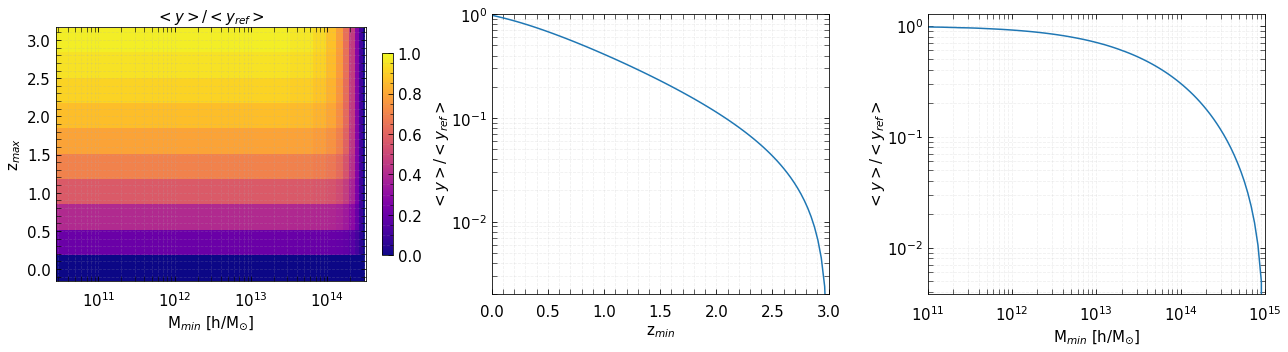

In [87]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

ax1.set_xscale('log')
ax1.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax1.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
plt.setp(ax1.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax1.get_xticklabels(), fontsize=label_size)
ax1.grid(visible=True, which="both", alpha=0.2, linestyle='--')
ax1.set_ylabel(r"z$_{max}$", fontsize=label_size)
ax1.set_xlabel(r"M$_{min}$ [h/M$_{\odot}$]", fontsize=label_size)
ymap=ax1.imshow(ys_zmin_Mmax_fix/norm_y, extent=axis_range, origin='lower', cmap='plasma',vmin=0, vmax=1)
cbar1 = fig.colorbar(ymap, ax=ax1,fraction=0.03, pad=0.05)


ax2.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax2.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
plt.setp(ax2.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax2.get_xticklabels(), fontsize=label_size)
ax2.grid(visible=True, which="both", alpha=0.2, linestyle='--')
ax2.set_xlabel(r"z$_{min}$", fontsize=label_size)
ax2.set_ylabel(r"$<y>/<y_{ref}>$", fontsize=label_size, labelpad=0.001)
ax2.set_yscale('log')
ax2.plot(zs, ys_zmin/norm_y)
ax2.set_ylim([2e-3,1])
ax2.set_xlim([0,3])

ax3.set_yscale('log')
ax3.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax3.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
plt.setp(ax3.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax3.get_xticklabels(), fontsize=label_size)
ax3.grid(visible=True, which="both", alpha=0.2, linestyle='--')
ax3.set_xlabel(r"M$_{min}$ [h/M$_{\odot}]$", fontsize=label_size)
ax3.set_ylabel(r"$<y>/<y_{ref}>$", fontsize=label_size, labelpad=0.001)
ax3.plot(Ms, ys_Mmin/norm_y)
# ax3.set_ylim([2e-3,1])
ax3.set_xlim([1e11,1e15])
ax3.set_xscale('log')

fig.tight_layout()
ax1.set_title(r"$<y>/<y_{ref}>$", fontsize=15)
plt.savefig("figures/mean_y_integrated_3subplots.pdf")